In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the data
data = pd.read_csv("df_calendar.csv")

# Specify the columns you want to keep, including the new calendar variables
columns_to_keep = ['datetime', 'Load',
                   'month_sin', 'month_cos', 'day_of_week_sin', 'day_of_week_cos', 'hour_sin', 'hour_cos']

# Use indexing to select the desired columns
df = data[columns_to_keep]


data['datetime'] = pd.to_datetime(data['datetime'])
# Set the 'datetime' column as the index
df.set_index('datetime', inplace=True)


df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22008 entries, 2019-03-21 00:00:00+00:00 to 2021-09-22 23:00:00+00:00
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Load             22008 non-null  float64
 1   month_sin        22008 non-null  float64
 2   month_cos        22008 non-null  float64
 3   day_of_week_sin  22008 non-null  float64
 4   day_of_week_cos  22008 non-null  float64
 5   hour_sin         22008 non-null  float64
 6   hour_cos         22008 non-null  float64
dtypes: float64(7)
memory usage: 1.3+ MB


In [2]:
# Shift the 'Load' column one hour ahead
df['Load_previous_hour'] = df['Load'].shift(1)

# Drop rows with missing values (NaN) resulting from the shift
df.dropna(inplace=True)



# Shift the 'Load' column 24 hours ahead
df['Load_same_hour_previous_day'] = df['Load'].shift(24)

# Drop rows with missing values (NaN) resulting from the shift
df.dropna(inplace=True)


# Shift the 'Load' column 168 hours ahead
df['Load_same_hour_previous_week'] = df['Load'].shift(168)

# Drop rows with missing values (NaN) resulting from the shift
df.dropna(inplace=True)

df

<ipython-input-2-71046169ef55>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Load_previous_hour'] = df['Load'].shift(1)
<ipython-input-2-71046169ef55>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
<ipython-input-2-71046169ef55>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Load_same

,Load,month_sin,month_cos,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos,Load_previous_hour,Load_same_hour_previous_day,Load_same_hour_previous_week
datetime,,,,,,,,,,
2019-03-29 01:00:00+00:00,305.032220,1.0,6.123234e-17,-0.433884,-0.900969,0.258819,0.965926,335.520830,295.829360,284.991214
2019-03-29 02:00:00+00:00,272.552310,1.0,6.123234e-17,-0.433884,-0.900969,0.500000,0.866025,305.032220,269.162204,258.781497
2019-03-29 03:00:00+00:00,258.534027,1.0,6.123234e-17,-0.433884,-0.900969,0.707107,0.707107,272.552310,251.866242,244.201686
2019-03-29 04:00:00+00:00,250.893882,1.0,6.123234e-17,-0.433884,-0.900969,0.866025,0.500000,258.534027,245.756491,237.131604
2019-03-29 05:00:00+00:00,248.525866,1.0,6.123234e-17,-0.433884,-0.900969,0.965926,0.258819,250.893882,245.213647,234.919885
...,...,...,...,...,...,...,...,...,...,...
2021-09-22 19:00:00+00:00,632.235500,-1.0,-1.836970e-16,0.974928,-0.222521,-0.965926,0.258819,613.496183,615.883920,634.458764
2021-09-22 20:00:00+00:00,612.703162,-1.0,-1.836970e-16,0.974928,-0.222521,-0.866025,0.500000,632.235500,632.415192,662.093462
2021-09-22 21:00:00+00:00,589.574385,-1.0,-1.836970e-16,0.974928,-0.222521,-0.707107,0.707107,612.703162,612.769148,642.473419


In [3]:

import pandas as pd

# Assuming you have a pandas DataFrame called 'df' with an index column called 'index_col'
df['datetime'] = df.index  # Create a new column with the index values
df.reset_index(drop=True, inplace=True)  # Remove the index

# Assuming you have a pandas DataFrame called 'df'
last_column = df.columns[-1]  # Get the name of the last column
df2 = df[[last_column] + df.columns[:-1].tolist()]

# The last column is now moved to the first position in the DataFrame
df2


<ipython-input-3-b5b4fbd24e40>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime'] = df.index  # Create a new column with the index values


,datetime,Load,month_sin,month_cos,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos,Load_previous_hour,Load_same_hour_previous_day,Load_same_hour_previous_week
0,2019-03-29 01:00:00+00:00,305.032220,1.0,6.123234e-17,-0.433884,-0.900969,0.258819,0.965926,335.520830,295.829360,284.991214
1,2019-03-29 02:00:00+00:00,272.552310,1.0,6.123234e-17,-0.433884,-0.900969,0.500000,0.866025,305.032220,269.162204,258.781497
2,2019-03-29 03:00:00+00:00,258.534027,1.0,6.123234e-17,-0.433884,-0.900969,0.707107,0.707107,272.552310,251.866242,244.201686
3,2019-03-29 04:00:00+00:00,250.893882,1.0,6.123234e-17,-0.433884,-0.900969,0.866025,0.500000,258.534027,245.756491,237.131604
4,2019-03-29 05:00:00+00:00,248.525866,1.0,6.123234e-17,-0.433884,-0.900969,0.965926,0.258819,250.893882,245.213647,234.919885
...,...,...,...,...,...,...,...,...,...,...,...
21810,2021-09-22 19:00:00+00:00,632.235500,-1.0,-1.836970e-16,0.974928,-0.222521,-0.965926,0.258819,613.496183,615.883920,634.458764
21811,2021-09-22 20:00:00+00:00,612.703162,-1.0,-1.836970e-16,0.974928,-0.222521,-0.866025,0.500000,632.235500,632.415192,662.093462
21812,2021-09-22 21:00:00+00:00,589.574385,-1.0,-1.836970e-16,0.974928,-0.222521,-0.707107,0.707107,612.703162,612.769148,642.473419
21813,2021-09-22 22:00:00+00:00,561.323968,-1.0,-1.836970e-16,0.974928,-0.222521,-0.500000,0.866025,589.574385,587.288539,617.966051


In [4]:
df2.to_csv('Calendar+3lag.csv', index=False)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21815 entries, 2019-03-29 01:00:00+00:00 to 2021-09-22 23:00:00+00:00
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Load                          21815 non-null  float64
 1   month_sin                     21815 non-null  float64
 2   month_cos                     21815 non-null  float64
 3   day_of_week_sin               21815 non-null  float64
 4   day_of_week_cos               21815 non-null  float64
 5   hour_sin                      21815 non-null  float64
 6   hour_cos                      21815 non-null  float64
 7   Load_previous_hour            21815 non-null  float64
 8   Load_same_hour_previous_day   21815 non-null  float64
 9   Load_same_hour_previous_week  21815 non-null  float64
dtypes: float64(10)
memory usage: 2.3+ MB


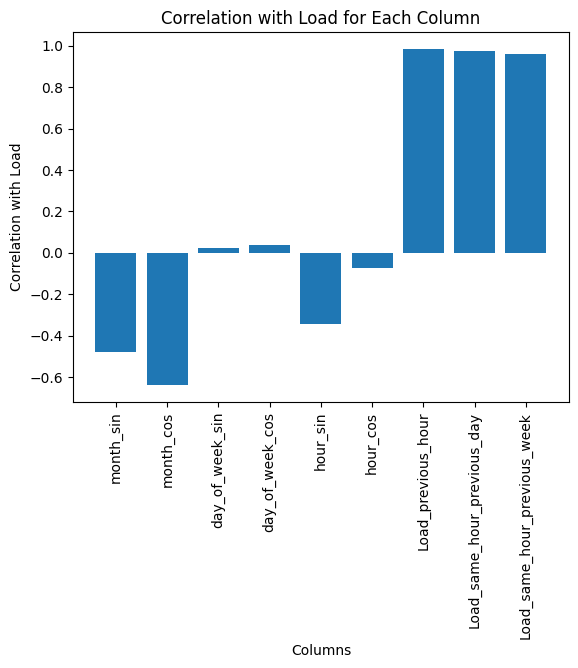

In [10]:
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Get the correlation values between 'Load' and other columns
load_correlations = corr_matrix['Load'].drop('Load')

# Plot bar chart of correlation values
plt.bar(load_correlations.index, load_correlations)
plt.xlabel('Columns')
plt.ylabel('Correlation with Load')
plt.title('Correlation with Load for Each Column')
plt.xticks(rotation=90)
plt.show()

In [4]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select the columns you want to scale
columns_to_scale = ['Load', 'month_sin', 'month_cos', 'day_of_week_sin', 'day_of_week_cos',
                    'hour_sin', 'hour_cos', 'Load_previous_hour', 'Load_same_hour_previous_day',
                    'Load_same_hour_previous_week']

# Scale the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Print the updated DataFrame
df

<ipython-input-4-d61c0f3d0868>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


,Load,month_sin,month_cos,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos,Load_previous_hour,Load_same_hour_previous_day,Load_same_hour_previous_week
datetime,,,,,,,,,,
2019-03-29 01:00:00+00:00,0.172193,1.0,0.5,0.277479,0.000000,0.629410,0.982963,0.229057,0.155028,0.134814
2019-03-29 02:00:00+00:00,0.111614,1.0,0.5,0.277479,0.000000,0.750000,0.933013,0.172193,0.105291,0.085929
2019-03-29 03:00:00+00:00,0.085468,1.0,0.5,0.277479,0.000000,0.853553,0.853553,0.111614,0.073032,0.058736
2019-03-29 04:00:00+00:00,0.071218,1.0,0.5,0.277479,0.000000,0.933013,0.750000,0.085468,0.061636,0.045550
2019-03-29 05:00:00+00:00,0.066801,1.0,0.5,0.277479,0.000000,0.982963,0.629410,0.071218,0.060624,0.041425
...,...,...,...,...,...,...,...,...,...,...
2021-09-22 19:00:00+00:00,0.782466,0.0,0.5,1.000000,0.356896,0.017037,0.629410,0.747515,0.751968,0.786613
2021-09-22 20:00:00+00:00,0.746036,0.0,0.5,1.000000,0.356896,0.066987,0.750000,0.782466,0.782801,0.838155
2021-09-22 21:00:00+00:00,0.702898,0.0,0.5,1.000000,0.356896,0.146447,0.853553,0.746036,0.746159,0.801561


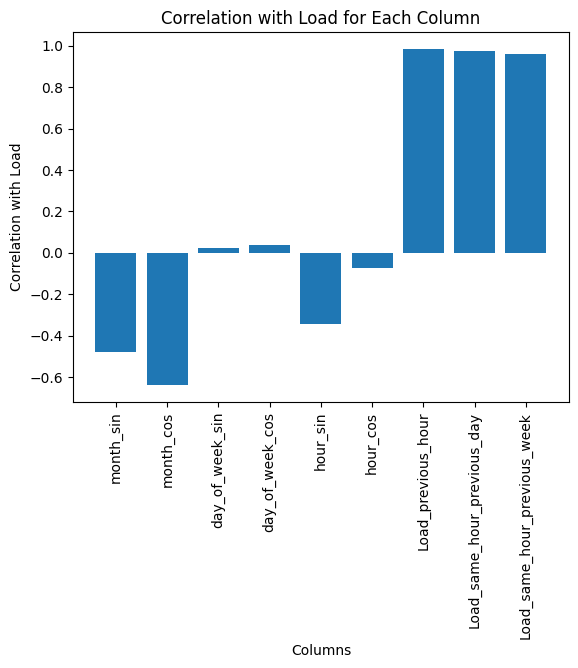

In [7]:
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Get the correlation values between 'Load' and other columns
load_correlations = corr_matrix['Load'].drop('Load')

# Plot bar chart of correlation values
plt.bar(load_correlations.index, load_correlations)
plt.xlabel('Columns')
plt.ylabel('Correlation with Load')
plt.title('Correlation with Load for Each Column')
plt.xticks(rotation=90)
plt.show()